In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [211]:
covidUS= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
df = pd.read_csv(covidUS)
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,319,319,330,337,337,337,337,349,351,354
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,38,38,38,38,38,40,40,40,40,42
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,...,72,72,72,72,73,74,77,77,77,77
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,...,71,75,78,82,84,89,91,92,95,96


In [212]:
df.shape

(3340, 201)

## Drop the useless columns

In [213]:
dropcol= ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2','Country_Region', 'Lat', 'Long_']
df.drop(dropcol, axis =1, inplace = True)
df.head()

,Province_State,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20
0,American Samoa,"American Samoa, US",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,"Guam, US",0,0,0,0,0,0,0,0,...,319,319,330,337,337,337,337,349,351,354
2,Northern Mariana Islands,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,...,38,38,38,38,38,40,40,40,40,42
3,Puerto Rico,"Adjuntas, Puerto Rico, US",0,0,0,0,0,0,0,0,...,72,72,72,72,73,74,77,77,77,77
4,Puerto Rico,"Aguada, Puerto Rico, US",0,0,0,0,0,0,0,0,...,71,75,78,82,84,89,91,92,95,96


In [214]:
df.shape

(3340, 192)

## Aggregating the rows by the state

In [215]:
df_aggregated= df.groupby('Province_State').sum()
df_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,68891,70358,71813,74212,76005,78130,79294,81115,82366,83782
Alaska,0,0,0,0,0,0,0,0,0,0,...,1950,2042,2131,2193,2249,2339,2525,2623,2730,2798
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,145183,148683,150609,152944,156301,160041,162014,163827,165934,168273
Arkansas,0,0,0,0,0,0,0,0,0,0,...,33927,34655,35246,36259,37249,37981,38623,39447,40181,40968
California,0,0,0,0,2,2,2,2,2,3,...,397870,409305,421286,430773,440185,446452,452288,458121,470762,484913
Colorado,0,0,0,0,0,0,0,0,0,0,...,40548,41041,41680,42295,42962,43771,44318,44547,45296,45778
Connecticut,0,0,0,0,0,0,0,0,0,0,...,48055,48096,48223,48232,48776,48776,48776,48983,49077,49540
Delaware,0,0,0,0,0,0,0,0,0,0,...,13624,13746,13792,13924,14202,14175,14290,14406,14476,14602


## Get top 10 states by [7/29/20]

In [216]:
 pd.DataFrame(df_aggregated['7/29/20']).sort_values(by='7/29/20', ascending= False).head(10)

,7/29/20
Province_State,
California,484913
Florida,451423
Texas,418995
New York,413593
New Jersey,180600
Georgia,178323
Illinois,176363
Arizona,168273
North Carolina,118387


## Visualizing data: California, Florida, Texas

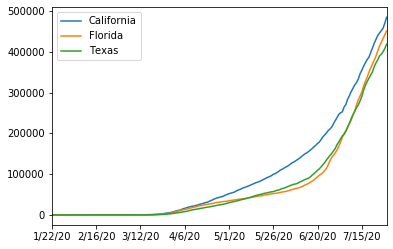

In [222]:
df_aggregated.loc['California'].plot()
df_aggregated.loc['Florida'].plot()
df_aggregated.loc['Texas'].plot()
plt.legend()

## Calculating and plotting the first derivative of the curve

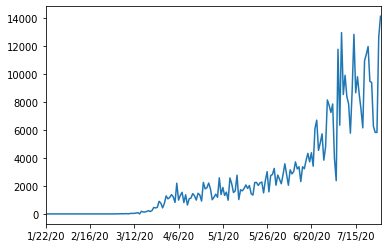

In [218]:
df_aggregated.loc['California'].diff().plot()

In [219]:
df_aggregated.loc['California'].diff()

1/22/20        NaN
1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        2.0
            ...   
7/25/20     6267.0
7/26/20     5836.0
7/27/20     5833.0
7/28/20    12641.0
7/29/20    14151.0
Name: California, Length: 190, dtype: float64

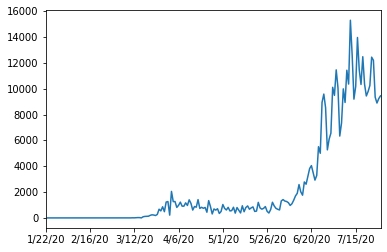

In [177]:
df_aggregated.loc['Florida'].diff().plot()

In [220]:
df_aggregated.loc['Florida'].diff()

1/22/20        NaN
1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
            ...   
7/25/20    12199.0
7/26/20     9344.0
7/27/20     8892.0
7/28/20     9230.0
7/29/20     9446.0
Name: Florida, Length: 190, dtype: float64

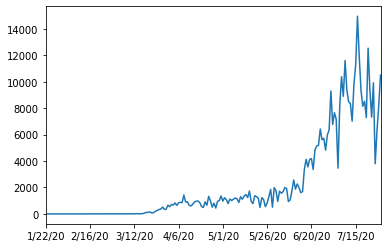

In [223]:
df_aggregated.loc['Texas'].diff().plot()

In [224]:
df_aggregated.loc['Texas'].diff()

1/22/20        NaN
1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
            ...   
7/25/20     9922.0
7/26/20     3798.0
7/27/20     6252.0
7/28/20     8157.0
7/29/20    10502.0
Name: Texas, Length: 190, dtype: float64

In [180]:
df_aggregated.loc['California'].diff().max()

14151.0

In [181]:
df_aggregated.loc['Florida'].diff().max()

15300.0

In [225]:
df_aggregated.loc['Texas'].diff().max()

14962.0